# Dataset Analysis

## Import

In [1]:
import csv
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Dataset

In [2]:
# Read tsv file
r_body = pd.read_csv('soc-redditHyperlinks-body.tsv', sep='\t')
r_title = pd.read_csv('soc-redditHyperlinks-title.tsv', sep='\t')

# Merge two dataframes
r = pd.concat([r_body, r_title])
r = r.drop(['PROPERTIES'], axis=1)

r_neg = r[r['LINK_SENTIMENT'] == -1]
r_pos = r[r['LINK_SENTIMENT'] == 1]


# Graph

In [24]:
# get graph with networkx
G_neg = nx.from_pandas_edgelist(r_neg, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT',edge_attr='LINK_SENTIMENT', create_using=nx.DiGraph())
G_pos = nx.from_pandas_edgelist(r_pos, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT',edge_attr='LINK_SENTIMENT', create_using=nx.DiGraph())
G = nx.from_pandas_edgelist(r, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT',edge_attr='LINK_SENTIMENT', create_using=nx.DiGraph())

# remove self loop
G_neg.remove_edges_from(nx.selfloop_edges(G_neg))
G_pos.remove_edges_from(nx.selfloop_edges(G_pos))
G.remove_edges_from(nx.selfloop_edges(G))

# remove nodes with degree 0
G_neg.remove_nodes_from(list(nx.isolates(G_neg)))
G_pos.remove_nodes_from(list(nx.isolates(G_pos)))
G.remove_nodes_from(list(nx.isolates(G)))

# print number of nodes
print('Number of nodes in negative graph: ', G_neg.number_of_nodes())
print('Number of nodes in positive graph: ', G_pos.number_of_nodes())
print('Number of nodes in total graph: ', G.number_of_nodes())

# get degree distribution
deg_neg = dict(G_neg.degree())
deg_pos = dict(G_pos.degree())
deg = dict(G.degree())

max_deg_neg = max(deg_neg.values())
max_deg_pos = max(deg_pos.values())
max_deg = max(deg.values())

print('\nMax degree of negative graph: ', max_deg_neg)
print('Max degree of positive graph: ', max_deg_pos)
print('Max degree of total graph: ', max_deg)

# removing nodes with degree under 5% of the max degree
deg_neg = {k: v for k, v in deg_neg.items() if v > 1}
deg_pos = {k: v for k, v in deg_pos.items() if v > 1}
deg = {k: v for k, v in deg.items() if v > 1}

# print number of nodes
print('\nNumber of nodes in negative graph after removing nodes with degree under 2: ', len(deg_neg))
print('Number of nodes in positive graph after removing nodes with degree under 2: ', len(deg_pos))
print('Number of nodes in total graph after removing nodes with degree under 2: ', len(deg))


Number of nodes in negative graph:  12069
Number of nodes in positive graph:  65892
Number of nodes in total graph:  67180

Max degree of negative graph:  2056
Max degree of positive graph:  5504
Max degree of total graph:  5811

Number of nodes in negative graph after removing nodes with degree under 5% of the max degree:  5458
Number of nodes in positive graph after removing nodes with degree under 5% of the max degree:  34302
Number of nodes in total graph after removing nodes with degree under 5% of the max degree:  35128


# Measures

In [25]:
import time

start_time = time.time()

# closeness
closeness_neg = nx.closeness_centrality(G_neg)
closeness_pos = nx.closeness_centrality(G_pos)
closeness = nx.closeness_centrality(G)
print("- Closeness done --- %s seconds ---" % (time.time() - start_time))

# betweenness
betweenness_neg = nx.betweenness_centrality(G_neg)
betweenness_pos = nx.betweenness_centrality(G_pos)
betweenness = nx.betweenness_centrality(G)
print("- Betweenness done --- %s seconds ---" % (time.time() - start_time))

# eigenvector
eigenvector_neg = nx.eigenvector_centrality(G_neg) 
eigenvector_pos = nx.eigenvector_centrality(G_pos)
eigenvector = nx.eigenvector_centrality(G)
print("- Eigenvector done --- %s seconds ---" % (time.time() - start_time))

# homophily
homophily_neg = nx.attribute_mixing_matrix(G_neg, 'LINK_SENTIMENT', normalized=True)
homophily_pos = nx.attribute_mixing_matrix(G_pos, 'LINK_SENTIMENT', normalized=True)
homophily = nx.attribute_mixing_matrix(G, 'LINK_SENTIMENT', normalized=True)
print("- Homophily done --- %s seconds ---" % (time.time() - start_time))

# modularity
modularity_neg = nx.algorithms.community.modularity(G_neg, nx.algorithms.community.greedy_modularity_communities(G_neg))
modularity_pos = nx.algorithms.community.modularity(G_pos, nx.algorithms.community.greedy_modularity_communities(G_pos))
modularity = nx.algorithms.community.modularity(G, nx.algorithms.community.greedy_modularity_communities(G))
print("- Modularity done --- %s seconds ---" % (time.time() - start_time))

- Closeness done
- Betweenness done
- Eigenvector done
- Homophily done
- Modularity done


In [27]:
import os 

if not os.path.exists('results'):
    os.makedirs('results')

# save results
with open('./results/deg_neg.csv', 'w') as f:
    for key in deg_neg.keys():
        f.write("%s,%s \n"%(key,deg_neg[key]))

with open('./results/deg_pos.csv', 'w') as f:
    for key in deg_pos.keys():
        f.write("%s,%s \n"%(key,deg_pos[key]))

with open('./results/deg.csv', 'w') as f:
    for key in deg.keys():
        f.write("%s,%s \n"%(key,deg[key]))

with open('./results/closeness_neg.csv', 'w') as f:
    for key in closeness_neg.keys():
        f.write("%s,%s \n"%(key,closeness_neg[key]))

with open('./results/closeness_pos.csv', 'w') as f:
    for key in closeness_pos.keys():
        f.write("%s,%s \n"%(key,closeness_pos[key]))

with open('./results/closeness.csv', 'w') as f:
    for key in closeness.keys():
        f.write("%s,%s \n"%(key,closeness[key]))

with open('./results/betweenness_neg.csv', 'w') as f:
    for key in betweenness_neg.keys():
        f.write("%s,%s \n"%(key,betweenness_neg[key]))
        
with open('./results/betweenness_pos.csv', 'w') as f:
    for key in betweenness_pos.keys():
        f.write("%s,%s \n"%(key,betweenness_pos[key]))

with open('./results/betweenness.csv', 'w') as f:
    for key in betweenness.keys():
        f.write("%s,%s \n"%(key,betweenness[key]))

with open('./results/eigenvector_neg.csv', 'w') as f:
    for key in eigenvector_neg.keys():
        f.write("%s,%s \n"%(key,eigenvector_neg[key]))

with open('./results/eigenvector_pos.csv', 'w') as f:
    for key in eigenvector_pos.keys():
        f.write("%s,%s \n"%(key,eigenvector_pos[key]))

with open('./results/eigenvector.csv', 'w') as f:
    for key in eigenvector.keys():
        f.write("%s,%s \n"%(key,eigenvector[key]))


In [30]:
print(modularity)
print(modularity_neg)
print(modularity_pos)
    


0.3655031988541194
0.3680835860764249
0.3755478393574472


# Dataframe

### generiamo tutte le coppie sorgente - target. Per ogni coppia teniamo traccia del numero totali di interazioni con il target

In [6]:
# df with all couple SOURCE TARGET with positive sentiment
reddit_positive = df_source_target(r_positive, 1)

# df with all couple SOURCE TARGET with negative sentiment
reddit_negative = df_source_target(r_negative, -1)


In [7]:
print(len(reddit_negative))
print(len(reddit_positive))

82210
776278


## Hub, Source, Sink
In the context of a network, a _Hub_ is a node with a large degree, meaning it has connections with many other nodes. A node is considered a *Source* in a graph if it has in-degree of 0 (no nodes have a source as their destination); likewise, a node is considered a _Sink_ in a graph if it has out-degree of 0 (no nodes have a sink as their source).

In [8]:
source_negative,sink_negative,hub_negative = gen_source_sink_hub(r_negative)
source_positive,sink_positive,hub_positive = gen_source_sink_hub(r_positive)

In [9]:
print("Numero di nodi source con negative sentiment: ",len(source_negative))
print("Numero di nodi sink con negative sentiment: ",len(sink_negative))
print("Numero di nodi hub con negative sentiment: ",len(hub_negative))

print("Numero di nodi source con positive sentiment: ",len(source_positive))
print("Numero di nodi sink con positive sentiment: ",len(sink_positive))
print("Numero di nodi hub con positive sentiment: ",len(hub_positive))

Numero di nodi source con negative sentiment:  5434
Numero di nodi sink con negative sentiment:  8022
Numero di nodi hub con negative sentiment:  65498
Numero di nodi source con positive sentiment:  31938
Numero di nodi sink con positive sentiment:  28614
Numero di nodi hub con positive sentiment:  678627


In [10]:
source_negative_2 = reddit_negative[reddit_negative['SOURCE_SUBREDDIT'].isin(source_negative['SOURCE_SUBREDDIT'])]

print(source_negative_2.groupby(['SOURCE_SUBREDDIT','TARGET_SUBREDDIT'])['SOURCE_SUBREDDIT'])

source_negative_2

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,TOTAL_LINK
315104,evenwithcontext,askreddit,97
440852,evenwithcontext,askreddit,97
452115,evenwithcontext,askreddit,97
98070,evenwithcontext,askreddit,97
386883,evenwithcontext,askreddit,97
...,...,...,...
139391,commentgore,mildlyinfuriating,1
139014,redditeditspeeches,videos,1
138601,blameamerica,askhistorians,1
138625,whowillbuildtheroads,todayilearned,1


# Statistics

In [11]:
statistics(reddit_negative)
# statistics(reddit_positive)


mean:  10.528962413331712
median:  3.0
std:  16.821986513506733
var:  282.9792302606024
max:  120
min:  1
sum:  865586
count:  82210
mode:  0    1
Name: TOTAL_LINK, dtype: int64
r_max10:  SOURCE_SUBREDDIT    21971
TARGET_SUBREDDIT    21971
TOTAL_LINK          21971
dtype: int64
r_min10:  SOURCE_SUBREDDIT    60239
TARGET_SUBREDDIT    60239
TOTAL_LINK          60239
dtype: int64


# Graph visualization

## Negative sentiment

/var/folders/b3/wwdp9x6d2_3fvz33_v4d_k_80000gn/T/ipykernel_31900/139343649.py:111: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


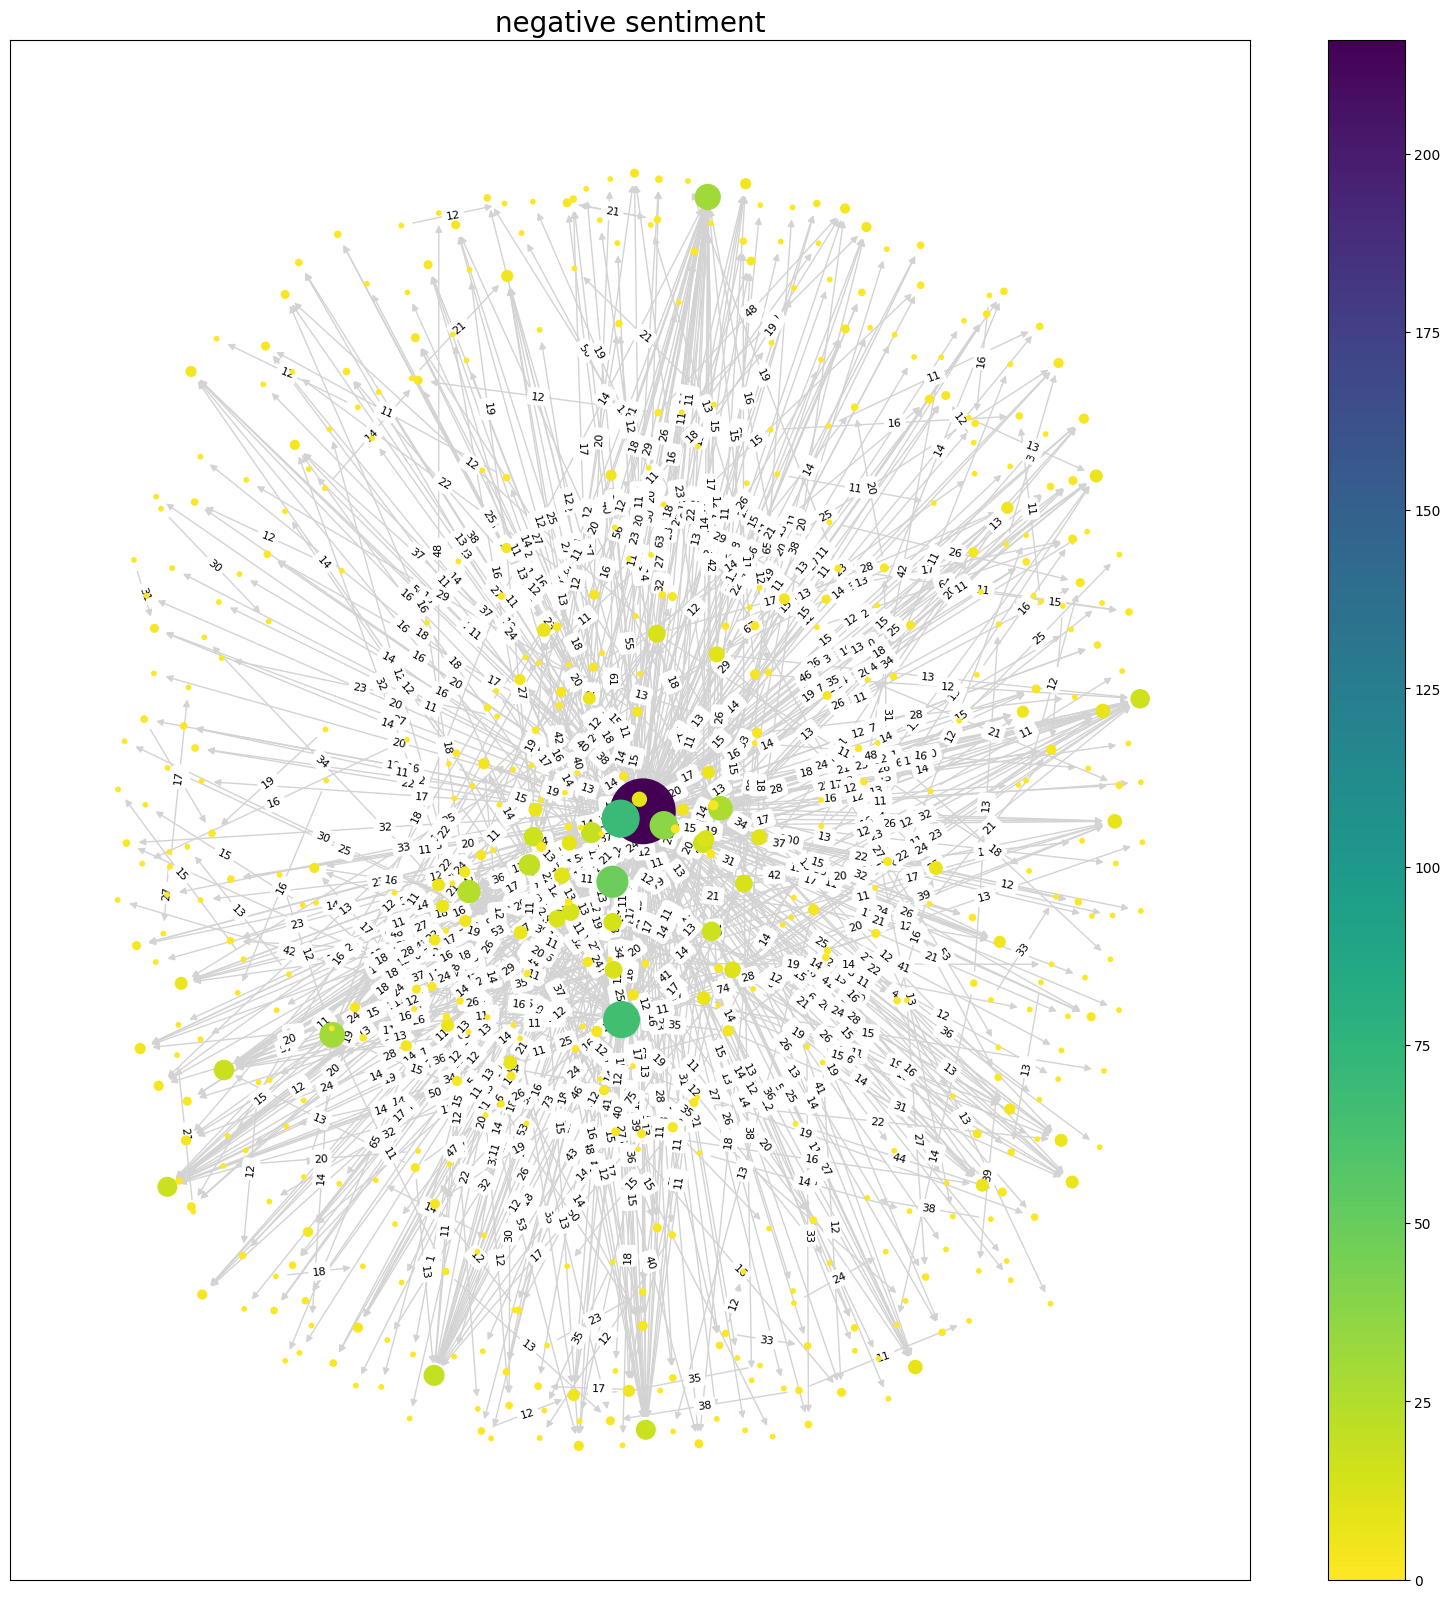

In [12]:
G_negative = gen_graph(reddit_negative[reddit_negative['TOTAL_LINK'] > 10])
gen_plot(G_negative, 'negative sentiment')


## Positive sentiment

/var/folders/b3/wwdp9x6d2_3fvz33_v4d_k_80000gn/T/ipykernel_31900/139343649.py:111: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


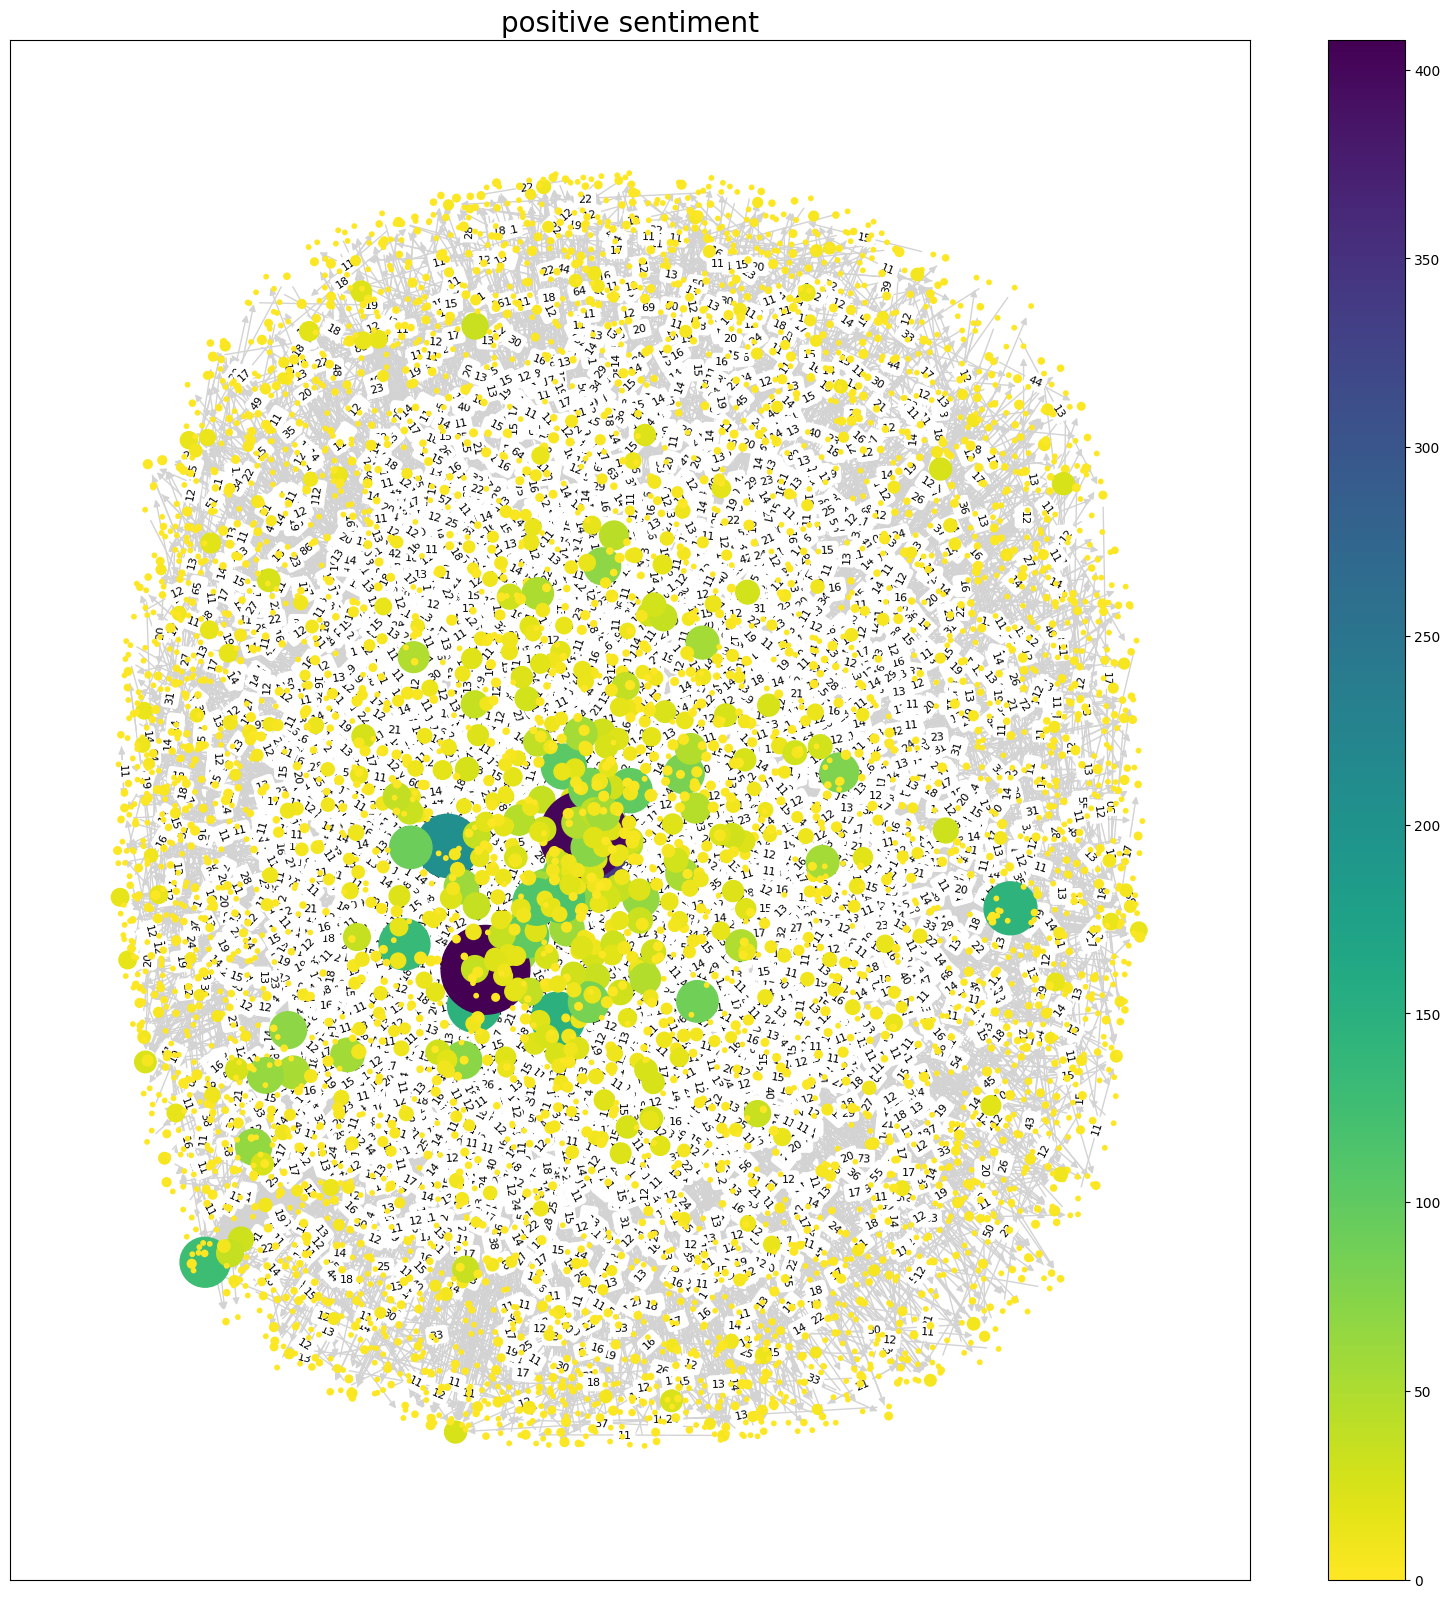

In [13]:
G_positive = gen_graph(reddit_positive[reddit_positive['TOTAL_LINK'] > 10])
gen_plot(G_positive, 'positive sentiment')


In [14]:
# show rows where link_sentiment is -1 (negative) and group by subreddit and count the number of rows
r = r_body[r_body['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

# order by count
r = r.sort_values(ascending=False)
r


SOURCE_SUBREDDIT
subredditdrama         1437
circlebroke             702
drama                   518
shitliberalssay         407
circlejerkcopypasta     380
                       ... 
mathideas                 1
maturechat                1
mautitest                 1
mavericks                 1
10cloverfieldlane         1
Name: LINK_SENTIMENT, Length: 4154, dtype: int64

In [15]:
# show rows where link_sentiment is -1 (negative) and group by subreddit and count the number of rows
r = r_title[r_title['LINK_SENTIMENT'] == -1].groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].count()

# order by count
r = r.sort_values(ascending=False)
